# Classify Status of Students


# **Table of Contents** 

1. [Problem Statement](#1)
2. [Importing libraries](#2)
3. [Reading dataset](#3)
4. [Exploring dataset](#4)
5. [Checking and Handling Missing Values](#5)
6. [Exploratory Data Analysis](#6)
7. [Correlation between Features](#7)
8. [Features & Target Variables](#8)
9. [Building Machine Learning Models Without Feature Scaling](#9)
10. [Best Model Selection Without Feature Scaling](#10)
11. [Feature Scaling](#11)
12. [Building Machine Learning Models & Select Best Model After Feature Scaling](#12)
13. [Conclusion](#13)

# **Problem Statement:** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)
>The main aim of this project is to Determine whether Student will Enroll,Graduate or Dropout from University. Classification  depends upon a number of factors like `Marital_status`,`Application_mode`,`Course`,`Attendance`,`Scholarship`,`Sem1_grade`,`Sem2_grade`, etc........

>In this project I want to build a model Using all Single and Ensemble Machine learning Models that will classify the status of students with maximum accuracy and minimal error .

# **Importing libraries:** <a class="anchor" id="2"></a>
[Table of Contents](#0.2)

In [71]:
#for linear algebra
import numpy as np

#for data processing
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

To hide Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Reading dataset:** <a class="anchor" id="3"></a>
[Table of Contents](#0.3)

In [4]:
df=pd.read_csv('dataset.csv',sep=';')


# **Exploring Dataset:** <a class="anchor" id="4"></a>
[Table of Contents](#0.4)

In [5]:
# To See Dataset
df.head(100)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,6,1,7,1,1,12,23,3,10,...,0,5,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled
96,1,1,5,15,1,1,1,22,1,6,...,0,6,6,6,13.333333,0,8.9,1.4,3.51,Graduate
97,1,1,5,12,1,1,1,22,27,8,...,0,8,9,8,14.477778,0,12.4,0.5,1.79,Graduate
98,1,1,1,6,1,1,1,1,2,10,...,0,5,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled


In [6]:
# Discover number of rows and columns
df.shape

(4424, 35)

In [7]:
# Check the columns' names
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [255]:
# Change Columns name to make it more simple
df.columns=['Marital_status','Application_mode','Application_order','Course','Attendance',
'Previous_qualification','Nacionality','Mum_qualification','Dad_qalification','Mum_occupation','Dad_occupation',
'Displaced','special_needs','Debtor','Fees','Gender','Scholarship','Enrollment_age','International','Sem1_credited',
'Sem1_enrolled','Sem1_evaluations','Sem1_approved','Sem1_grade','Sem1_without_evaluations','Sem2_credited'
,'Sem2_enrolled','Sem2_evaluations','Sem2_approved','Sem2_grade','Sem2_without_evaluations','Unemployment_rate',
'Inflation_rate','GDP','Target']

In [256]:
# Check columns name after update
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Attendance', 'Previous_qualification', 'Nacionality',
       'Mum_qualification', 'Dad_qalification', 'Mum_occupation',
       'Dad_occupation', 'Displaced', 'special_needs', 'Debtor', 'Fees',
       'Gender', 'Scholarship', 'Enrollment_age', 'International',
       'Sem1_credited', 'Sem1_enrolled', 'Sem1_evaluations', 'Sem1_approved',
       'Sem1_grade', 'Sem1_without_evaluations', 'Sem2_credited',
       'Sem2_enrolled', 'Sem2_evaluations', 'Sem2_approved', 'Sem2_grade',
       'Sem2_without_evaluations', 'Unemployment_rate', 'Inflation_rate',
       'GDP', 'Target'],
      dtype='object')

In [257]:
# Review dataset after columns name update
df.head(50)

,Marital_status,Application_mode,Application_order,Course,Attendance,Previous_qualification,Nacionality,Mum_qualification,Dad_qalification,Mum_occupation,...,Sem2_credited,Sem2_enrolled,Sem2_evaluations,Sem2_approved,Sem2_grade,Sem2_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [258]:
# checking data types of columns
df.dtypes

Marital_status                int64
Application_mode              int64
Application_order             int64
Course                        int64
Attendance                    int64
Previous_qualification        int64
Nacionality                   int64
Mum_qualification             int64
Dad_qalification              int64
Mum_occupation                int64
Dad_occupation                int64
Displaced                     int64
special_needs                 int64
Debtor                        int64
Fees                          int64
Gender                        int64
Scholarship                   int64
Enrollment_age                int64
International                 int64
Sem1_credited                 int64
Sem1_enrolled                 int64
Sem1_evaluations              int64
Sem1_approved                 int64
Sem1_grade                  float64
Sem1_without_evaluations      int64
Sem2_credited                 int64
Sem2_enrolled                 int64
Sem2_evaluations            

In [259]:
# Preview about dataset including:its name,datatype of each column and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Marital_status            4424 non-null   int64  
 1   Application_mode          4424 non-null   int64  
 2   Application_order         4424 non-null   int64  
 3   Course                    4424 non-null   int64  
 4   Attendance                4424 non-null   int64  
 5   Previous_qualification    4424 non-null   int64  
 6   Nacionality               4424 non-null   int64  
 7   Mum_qualification         4424 non-null   int64  
 8   Dad_qalification          4424 non-null   int64  
 9   Mum_occupation            4424 non-null   int64  
 10  Dad_occupation            4424 non-null   int64  
 11  Displaced                 4424 non-null   int64  
 12  special_needs             4424 non-null   int64  
 13  Debtor                    4424 non-null   int64  
 14  Fees    

In [260]:
# Summary Statisics of Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mum_qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Dad_qalification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mum_occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


---
# **Observation:**
-All columns are numerical variables except one column which is categorical .
-The only categorical variable column is the label column `Target`.

---

# **Checking and Handling Missing Values:** <a class="anchor" id="5"></a>
[Table of Contents](#0.5)

In [261]:
# check for missing values
df.isna().sum()

Marital_status              0
Application_mode            0
Application_order           0
Course                      0
Attendance                  0
Previous_qualification      0
Nacionality                 0
Mum_qualification           0
Dad_qalification            0
Mum_occupation              0
Dad_occupation              0
Displaced                   0
special_needs               0
Debtor                      0
Fees                        0
Gender                      0
Scholarship                 0
Enrollment_age              0
International               0
Sem1_credited               0
Sem1_enrolled               0
Sem1_evaluations            0
Sem1_approved               0
Sem1_grade                  0
Sem1_without_evaluations    0
Sem2_credited               0
Sem2_enrolled               0
Sem2_evaluations            0
Sem2_approved               0
Sem2_grade                  0
Sem2_without_evaluations    0
Unemployment_rate           0
Inflation_rate              0
GDP       

In [262]:
df.isnull().sum()

Marital_status              0
Application_mode            0
Application_order           0
Course                      0
Attendance                  0
Previous_qualification      0
Nacionality                 0
Mum_qualification           0
Dad_qalification            0
Mum_occupation              0
Dad_occupation              0
Displaced                   0
special_needs               0
Debtor                      0
Fees                        0
Gender                      0
Scholarship                 0
Enrollment_age              0
International               0
Sem1_credited               0
Sem1_enrolled               0
Sem1_evaluations            0
Sem1_approved               0
Sem1_grade                  0
Sem1_without_evaluations    0
Sem2_credited               0
Sem2_enrolled               0
Sem2_evaluations            0
Sem2_approved               0
Sem2_grade                  0
Sem2_without_evaluations    0
Unemployment_rate           0
Inflation_rate              0
GDP       

 ---
# **Observation:**
-There isn't any null values in any column on the dataset,so there's no need to handle any missinfg value

---

# **Exploring Data Analysis:** <a class="anchor" id="6"></a>
[Table of Contents](#0.6)

In [263]:
# Check if there's duplicated rows to remove it
df.duplicated().sum()

0

---
# **Observation:**
-There isn't any Duplicated Rows in the dataset,so there's no need to remove any row from the dataset.

---

Exploring the label column`Target`

In [14]:
# check labels and number of unique values in Target variable 
print('Number of Unique Values are :',df.Target.nunique())
df.Target.unique()

Number of Unique Values are : 3


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [15]:
# check frequency distribution of values in Target variable
df.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

# Visual Distribution of `Target` Variable

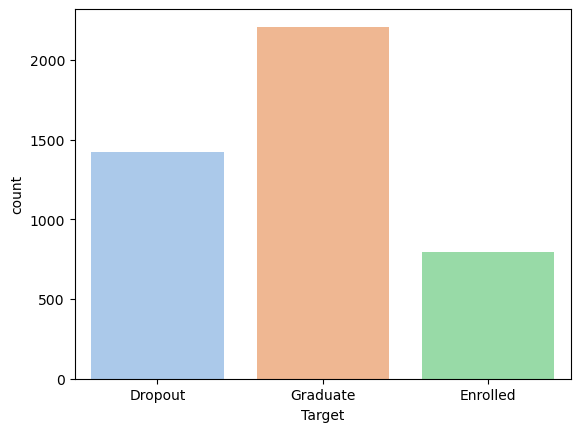

Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

In [16]:
sns.countplot(x='Target',data=df,palette='pastel')
plt.show()
df.Target.value_counts(normalize=True)

Notice that Percentage of 1 which represent `Enrolled` is very low so I will remove it.

In [17]:
# Perform Label Encoding on Target Column
df["Target"]=df.Target.map(dict( Dropout =0, Graduate=1, Enrolled=2))

In [22]:
# To drop rows with have Enabled value in Target column 
df=df[df['Target']!=2]
# To check that enabled value is deleted from Target column
df.Target.value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [23]:
# To check that rows with have Enabled value in Target column are dropped 
df.shape   

(3630, 35)

# Exploring  all the Numerical Features which are 33 Column

In [41]:
# check labels in Martial_status variable
df.Marital_status.unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [42]:
# check frequency distribution of values in Marital_status variable
df.Marital_status.value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital_status, dtype: int64

In [44]:
# check labels in Application_mode variable
df.Application_mode.unique()

array([ 8,  6,  1, 12,  9, 17, 15, 16, 14,  4, 13,  7,  3,  2,  5, 18, 10,
       11], dtype=int64)

In [45]:
# check frequency distribution of values in Application_mode variable
df.Application_mode.value_counts()

1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: Application_mode, dtype: int64

In [48]:
# check labels in Application_order variable
df.Application_order.unique()

array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

In [49]:
# check frequency distribution of values in Application_order variable
df.Application_order.value_counts()

1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application_order, dtype: int64

In [50]:
# check labels in Course variable
df.Course.unique()

array([ 2, 11,  5, 15,  3, 17, 12, 10, 14, 16,  6,  8, 13,  9,  4,  1,  7],
      dtype=int64)

In [51]:
# check frequency distribution of values in Course variable
df.Course.value_counts()

12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: Course, dtype: int64

In [52]:
# check labels in Attendance variable
df.Attendance.unique()

array([1, 0], dtype=int64)

In [53]:
# check frequency distribution of values in Attendance variable
df.Attendance.value_counts()

1    3941
0     483
Name: Attendance, dtype: int64

In [56]:
# check labels in Previous_qualification variable
df.Previous_qualification.unique()

array([ 1, 12, 16, 14,  8,  3, 15,  2,  4,  9, 17, 11,  6,  7, 13,  5, 10],
      dtype=int64)

In [57]:
# check frequency distribution of values in Previous_qualification variable
df.Previous_qualification.value_counts()

1     3717
14     219
12     162
3      126
9       45
15      40
16      36
2       23
6       16
7       11
4        8
13       7
17       6
8        4
11       2
5        1
10       1
Name: Previous_qualification, dtype: int64

In [58]:
# check labels in Nacionality variable
df.Nacionality.unique()

array([ 1, 15,  3, 14, 12, 18,  5, 11,  8, 17,  4,  9, 13, 16, 10, 21,  2,
       20, 19,  6,  7], dtype=int64)

In [59]:
# check frequency distribution of values in Nacionality variable
df.Nacionality.value_counts()

1     4314
14      38
12      14
9       13
3       13
10       5
16       3
4        3
18       3
8        2
17       2
15       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: Nacionality, dtype: int64

In [60]:
# check labels in Mum_qualification variable
df.Mum_qualification.unique()

array([13,  1, 22, 23,  3,  4, 27,  2, 19, 10, 25,  7,  5, 24,  9, 26, 18,
       11, 20, 21,  6,  8, 17, 28, 12, 14, 16, 15, 29], dtype=int64)

In [61]:
# check frequency distribution of values in Mum_qualification variable
df.Mum_qualification.value_counts()

1     1069
22    1009
13     953
23     562
3      438
19     130
2       83
4       49
10      42
5       21
25       9
7        8
24       8
26       6
6        4
27       4
28       4
17       3
8        3
9        3
21       3
20       3
18       3
11       2
12       1
14       1
16       1
15       1
29       1
Name: Mum_qualification, dtype: int64

In [72]:
# check labels and number of unique values in Dad_Qualification variable 
print('Number of Unique Values are :',df.Dad_qalification.nunique())
df.Dad_qalification.unique()

Number of Unique Values are : 34


array([10,  3, 27, 28,  1, 14,  5,  4, 24,  2, 29,  9,  7, 26, 18, 30, 12,
       15, 25, 31, 16, 11, 20, 33, 13, 32,  8,  6, 21, 17, 34, 23, 19, 22],
      dtype=int64)

In [63]:
# check frequency distribution of values in Dad_qalification variable
df.Dad_qalification.value_counts()

27    1209
14     968
1      904
28     702
3      282
24     112
2       68
4       39
10      38
29      20
5       18
9       10
26       8
7        5
30       5
16       4
21       4
12       4
20       3
25       2
31       2
33       2
8        2
6        2
18       2
17       1
19       1
23       1
34       1
15       1
32       1
13       1
11       1
22       1
Name: Dad_qalification, dtype: int64

In [73]:
# check labels and number of unique values in Mum_occupation variable
print('Number of Unique values are :',df.Mum_occupation.nunique())
df.Mum_occupation.unique()

Number of Unique values are : 32


array([ 6,  4, 10,  8,  5,  2, 16,  1,  7,  3, 12,  9, 20, 28, 13, 29, 23,
       32, 30, 18, 24, 19, 11, 21, 15, 27, 31, 14, 22, 17, 26, 25],
      dtype=int64)

In [65]:
# check frequency distribution of values in Mum_occupation variable
df.Mum_occupation.value_counts()

10    1577
5      817
6      530
4      351
3      318
8      272
1      144
2      102
7       91
12      70
9       36
29      26
13      17
32      11
20       8
15       7
22       6
28       5
30       5
31       4
19       4
11       4
21       3
23       3
18       3
24       2
14       2
25       2
27       1
16       1
17       1
26       1
Name: Mum_occupation, dtype: int64

In [69]:
# check labels and number of unique values in Dad_occupation variable 
print('Number of Unique Values are :',df.Dad_occupation.nunique())
df.Dad_occupation.unique()

Number of Unique Values are : 46


array([10,  4,  8, 11,  6,  9,  5,  2,  3, 22,  7,  1, 12, 39, 19, 13, 29,
       46, 43, 34, 44, 30, 41, 24, 23, 45, 35, 26, 28, 36, 16, 37, 31, 42,
       20, 15, 40, 25, 21, 17, 32, 38, 27, 18, 14, 33], dtype=int64)

In [74]:
# check frequency distribution of values in Dad_occupation variable
df.Dad_occupation.value_counts()

10    1010
8      666
6      516
5      386
4      384
9      318
11     266
7      242
3      197
2      134
1      128
12      65
13      19
44      15
29       8
36       8
43       6
35       5
16       4
39       4
26       3
42       3
31       3
21       3
40       3
45       2
41       2
17       2
30       2
37       2
20       2
15       2
32       1
14       1
18       1
38       1
27       1
24       1
25       1
28       1
23       1
34       1
46       1
19       1
22       1
33       1
Name: Dad_occupation, dtype: int64

In [75]:
# check labels in Displaced variable
print('Number of Unique Values are :',df.Displaced.nunique())
df.Displaced.nunique()

Number of Unique Values are : 2


2

In [76]:
# check frequency distribution of values in Displaced variable
df.Displaced.value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

In [77]:
# check labels and number of unique values in special_needs variable 
print('Number of Unique Values are :',df.special_needs.nunique())
df.special_needs.unique()  

Number of Unique Values are : 2


array([0, 1], dtype=int64)

In [78]:
# check frequency distribution of values in special_needs variable
df.special_needs.value_counts()# student with special needs or not

0    4373
1      51
Name: special_needs, dtype: int64

In [79]:
# check labels and number of unique values in Debtor variable 
print('Number of Unique Values are :',df.Debtor.nunique())
df.Debtor.unique()

Number of Unique Values are : 2


array([0, 1], dtype=int64)

In [80]:
# check frequency distribution of values in Course variable
df.Debtor.value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

In [81]:
# check labels and number of unique values in Fees variable 
print('Number of Unique Values are :',df.Fees.nunique())
df.Fees.unique() # pay fees or not

Number of Unique Values are : 2


array([1, 0], dtype=int64)

In [82]:
# check frequency distribution of values in Fees variable
df.Fees.value_counts()

1    3896
0     528
Name: Fees, dtype: int64

In [83]:
# check labels and number of unique values in Gender variable 
print('Number of Unique Values are :',df.Gender.nunique())
df.Gender.unique()

Number of Unique Values are : 2


array([1, 0], dtype=int64)

In [84]:
# check frequency distribution of values in Course variable
df.Gender.value_counts()  # 0 for female and 1 for male

0    2868
1    1556
Name: Gender, dtype: int64

In [85]:
# check labels and number of unique values in Scholarship variable 
print('Number of Unique Values are :',df.Scholarship.nunique())
df.Scholarship.unique()

Number of Unique Values are : 2


array([0, 1], dtype=int64)

In [86]:
# check frequency distribution of values in Scholarship variable
df.Scholarship.value_counts()  # if student has a scolarship or not

0    3325
1    1099
Name: Scholarship, dtype: int64

In [87]:
# check labels and number of unique values in Enrollment_age variable 
print('Number of Unique Values are :',df.Enrollment_age.nunique())
df.Enrollment_age.unique()

Number of Unique Values are : 46


array([20, 19, 45, 50, 18, 22, 21, 34, 37, 43, 55, 39, 29, 24, 27, 23, 26,
       33, 35, 25, 44, 36, 47, 28, 38, 30, 31, 32, 40, 42, 48, 49, 46, 41,
       70, 60, 53, 51, 52, 54, 61, 58, 59, 17, 57, 62], dtype=int64)

In [88]:
# check frequency distribution of values in Enrollment_age variable
df.Enrollment_age.value_counts()

18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
42      13
49      13
46      12
48      11
51       7
54       7
53       7
17       5
55       5
52       4
59       3
58       3
57       2
60       2
61       1
70       1
62       1
Name: Enrollment_age, dtype: int64

In [89]:
# check labels and number of unique values in International variable 
print('Number of Unique Values are :',df.International.nunique())
df.International.unique()

Number of Unique Values are : 2


array([0, 1], dtype=int64)

In [90]:
# check frequency distribution of values in International variable
df.International.value_counts()

0    4314
1     110
Name: International, dtype: int64

In [92]:
# check labels and number of unique values in Sem1_credited variable 
print('Number of Unique Values are :',df.Sem1_credited.nunique())
df.Sem1_credited.unique()

Number of Unique Values are : 21


array([ 0,  2,  3,  6,  7, 13,  4,  1,  5, 19, 11,  8, 10,  9, 15, 12, 14,
       18, 17, 16, 20], dtype=int64)

In [93]:
# check frequency distribution of values in Sem1_credited variable
df.Sem1_credited.value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
19       2
20       2
Name: Sem1_credited, dtype: int64

In [94]:
# check labels and number of unique values in Sem1_enrolled variable 
print('Number of Unique Values are :',df.Sem1_enrolled.nunique())
df.Sem1_enrolled.unique()

Number of Unique Values are : 23


array([ 0,  6,  5,  7,  8,  1, 12, 10, 18,  9, 21,  3, 17, 16, 11, 14, 13,
        2,  4, 15, 19, 23, 26], dtype=int64)

In [95]:
# check frequency distribution of values in Sem1_enrolled variable
df.Sem1_enrolled.value_counts()

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Sem1_enrolled, dtype: int64

In [101]:
# check labels and number of unique values in Sem1_evaluations variable 
print('Number of Unique Values are :',df.Sem1_evaluations.nunique())
df.Sem1_evaluations.unique()

Number of Unique Values are : 35


array([ 0,  6,  8,  9, 10,  5,  7, 14, 12, 15, 13, 11,  1, 17, 18, 19, 21,
        4, 16,  3, 24,  2, 22, 45, 20, 26, 29, 36, 32, 23, 27, 31, 28, 25,
       33], dtype=int64)

In [102]:
# check frequency distribution of values in Sem1_evaluations variable
df.Sem1_evaluations.value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
3       6
24      6
1       6
26      4
25      3
27      2
29      2
45      2
32      1
36      1
31      1
28      1
33      1
Name: Sem1_evaluations, dtype: int64

In [103]:
# check labels and number of unique values in Sem1_approved variable 
print('Number of Unique Values are :',df.Sem1_approved.nunique())
df.Sem1_approved.unique()

Number of Unique Values are : 23


array([ 0,  6,  5,  7,  4,  1,  3,  2,  8, 18, 10,  9, 21, 11, 13, 12, 16,
       14, 17, 19, 15, 20, 26], dtype=int64)

In [104]:
# check frequency distribution of values in Sem1_approved variable
df.Sem1_approved.value_counts()

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Sem1_approved, dtype: int64

In [105]:
# check labels and number of unique values in Sem1_grade variable 
print('Number of Unique Values are :',df.Sem1_grade.nunique())
df.Sem1_grade.unique()

Number of Unique Values are : 805


array([ 0.        , 14.        , 13.42857143, 12.33333333, 11.85714286,
       13.3       , 13.875     , 11.4       , 13.21428571, 10.57142857,
       13.25      , 13.2       , 12.        , 13.30625   , 12.5       ,
       11.66666667, 11.4375    , 12.85714286, 13.375     , 13.29666667,
       11.6       , 11.375     , 12.66666667, 12.93333333, 12.83333333,
       11.33333333, 12.4       , 10.        , 11.        , 12.75      ,
       14.8       , 13.928     , 13.        , 11.5       , 13.51666667,
       13.66666667, 11.83333333, 14.71428571, 10.6       , 13.04444444,
       14.935     , 13.13333333, 11.9       , 12.57142857, 11.2       ,
       11.975     , 10.33333333, 10.5       , 14.84285714, 12.2       ,
       12.16666667, 13.08      , 10.66666667, 11.875     , 13.75      ,
       14.2       , 11.96      , 12.875     , 14.63157895, 13.26666667,
       13.85714286, 13.4       , 12.51666667, 11.61666667, 13.14285714,
       12.6       , 10.8       , 12.8       , 14.16666667, 12.1 

In [106]:
# check frequency distribution of values in Sem1_grade variable
df.Sem1_grade.value_counts()

0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
12.855556      1
13.040000      1
15.657143      1
13.331429      1
14.912500      1
Name: Sem1_grade, Length: 805, dtype: int64

In [107]:
# check labels and number of unique values in Sem1_without_evaluations variable 
print('Number of Unique Values are :',df.Sem1_without_evaluations.nunique())
df.Sem1_without_evaluations.unique()

Number of Unique Values are : 11


array([ 0,  1,  2,  4,  3,  6, 12, 10,  7,  5,  8], dtype=int64)

In [108]:
# check frequency distribution of values in Sem1_without_evaluations variable
df.Sem1_without_evaluations.value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Sem1_without_evaluations, dtype: int64

# Outlier Detection

<Axes: >

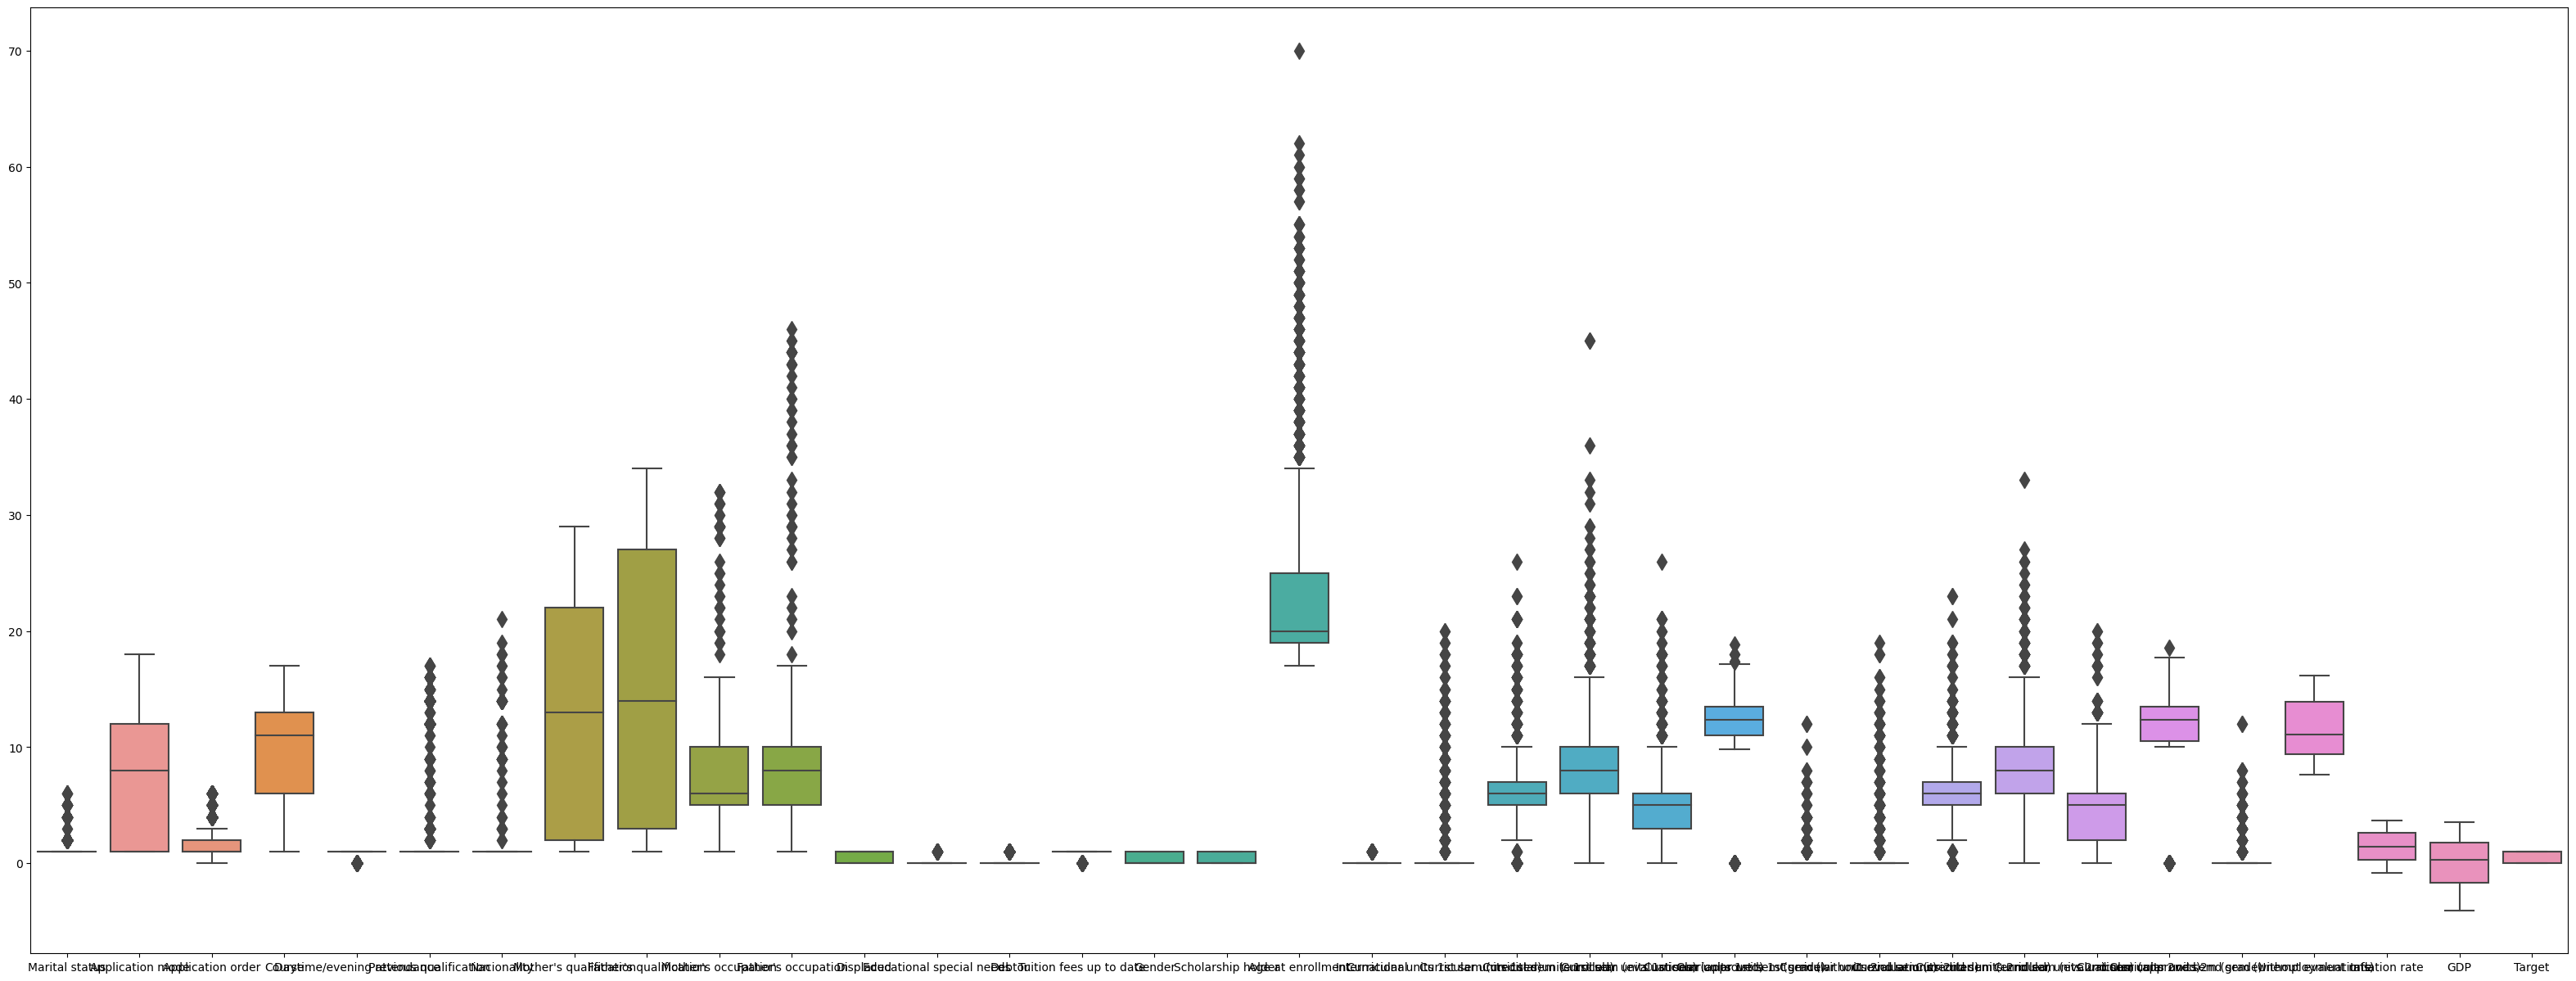

In [24]:
# Explore Outliers in all columns
plt.figure(figsize=(40,15))
sns.boxplot(data=df,fliersize=10)  

# **Correlation between Features:** <a class="anchor" id="7"></a>
[Table of Contents](#0.7)

In [25]:
corr=df.corr().T
corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.235554,-0.130370,0.003120,-0.265823,0.134920,-0.020139,0.177000,0.122920,0.070876,...,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,-0.100479
Application mode,0.235554,1.000000,-0.246369,-0.083865,-0.276859,0.429339,-0.009654,0.096560,0.086848,0.014639,...,0.235376,0.129428,0.160493,-0.076839,-0.124287,0.052751,0.075779,-0.027668,-0.014998,-0.233888
Application order,-0.130370,-0.246369,1.000000,0.124436,0.165494,-0.204205,-0.033548,-0.055105,-0.054670,-0.036993,...,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Course,0.003120,-0.083865,0.124436,1.000000,-0.033420,-0.156097,0.002081,0.039210,0.031936,0.015836,...,-0.122366,0.184817,0.063649,0.104974,0.171483,-0.015006,-0.053998,0.038674,0.005770,0.006814
Daytime/evening attendance,-0.265823,-0.276859,0.165494,-0.033420,1.000000,-0.120619,0.032272,-0.179286,-0.133407,-0.035792,...,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,0.084496
Previous qualification,0.134920,0.429339,-0.204205,-0.156097,-0.120619,1.000000,-0.035397,0.011777,0.022088,0.001426,...,0.139557,0.052077,0.084018,-0.046298,-0.051467,0.045677,0.086015,-0.059770,0.058446,-0.102795
Nacionality,-0.020139,-0.009654,-0.033548,0.002081,0.032272,-0.035397,1.000000,-0.029701,-0.075359,0.023369,...,0.002243,-0.028418,-0.025326,-0.017487,-0.010592,-0.012158,-0.002953,-0.010158,0.028410,-0.003823
Mother's qualification,0.177000,0.096560,-0.055105,0.039210,-0.179286,0.011777,-0.029701,1.000000,0.532757,0.309000,...,0.035655,0.030811,0.030954,-0.024289,-0.031406,0.027816,-0.113616,0.055484,-0.071692,-0.048459
Father's qualification,0.122920,0.086848,-0.054670,0.031936,-0.133407,0.022088,-0.075359,0.532757,1.000000,0.222273,...,0.045833,0.028976,0.014340,0.002196,-0.007022,0.002835,-0.072628,0.061684,-0.058259,-0.003850
Mother's occupation,0.070876,0.014639,-0.036993,0.015836,-0.035792,0.001426,0.023369,0.309000,0.222273,1.000000,...,-0.003886,0.001080,-0.006691,0.030936,0.041212,-0.001678,0.009914,0.030070,0.070732,0.064195


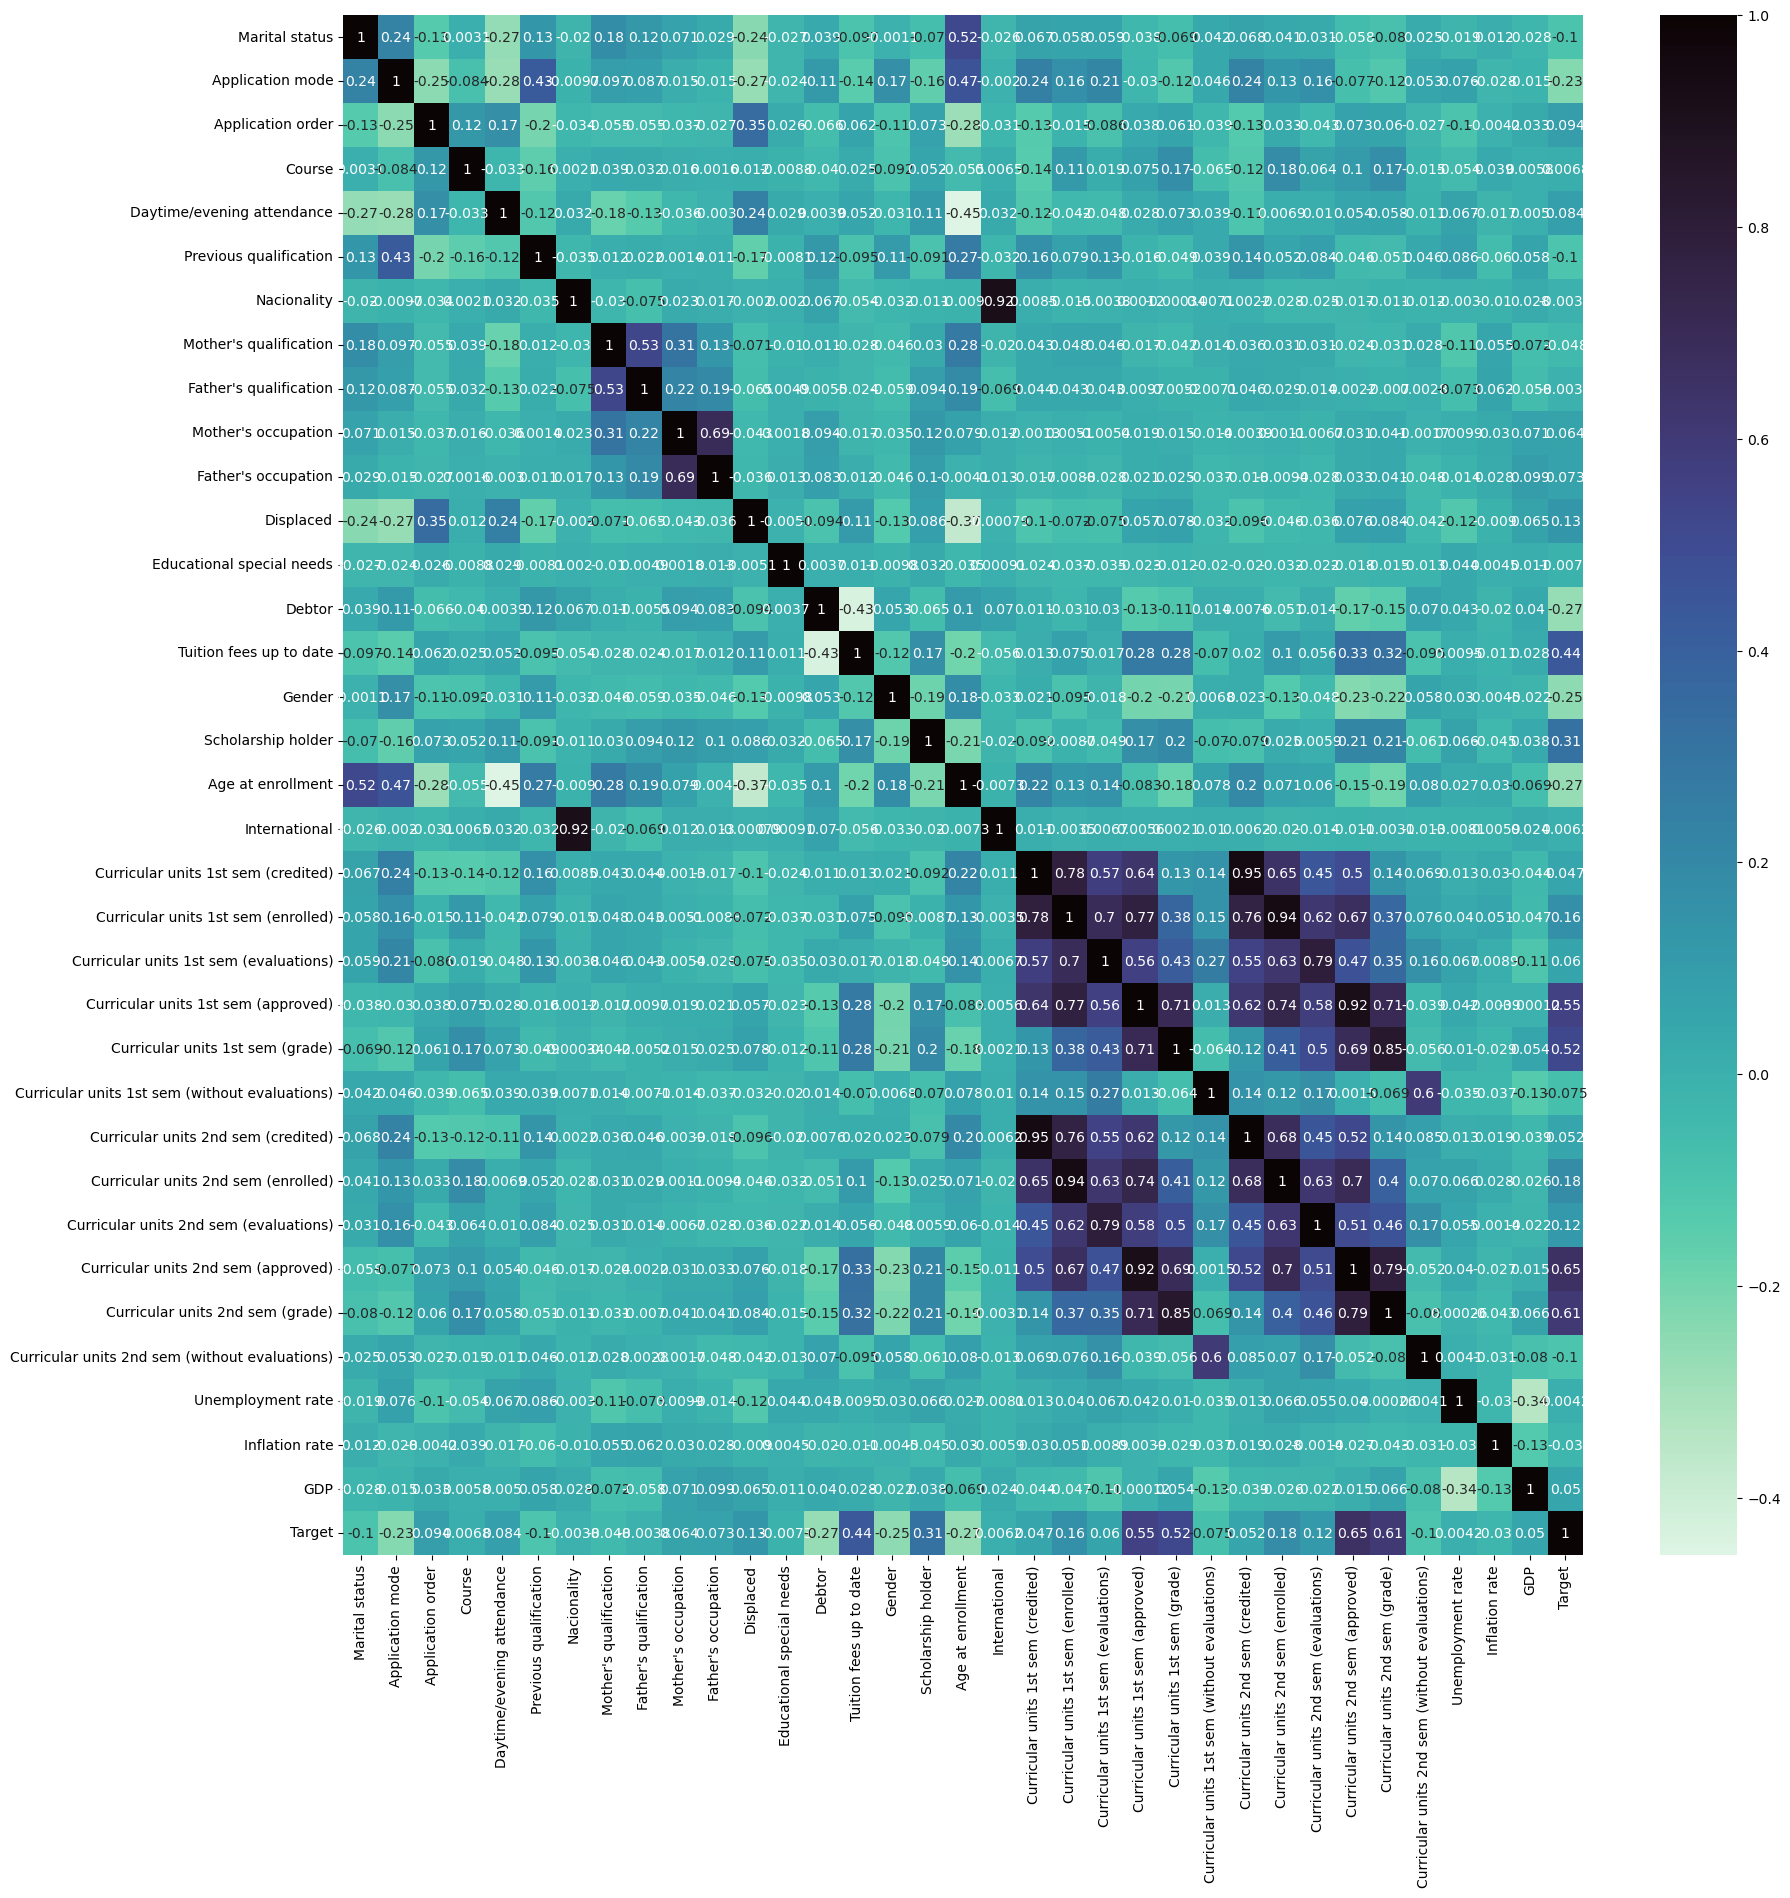

In [26]:
# Correlation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [27]:
# Get the absolute value of the correlation
cor_target = abs(corr['Target'])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>=0.1]

In [28]:
cor_target

Marital status                                    0.100479
Application mode                                  0.233888
Application order                                 0.094355
Course                                            0.006814
Daytime/evening attendance                        0.084496
Previous qualification                            0.102795
Nacionality                                       0.003823
Mother's qualification                            0.048459
Father's qualification                            0.003850
Mother's occupation                               0.064195
Father's occupation                               0.073238
Displaced                                         0.126113
Educational special needs                         0.007254
Debtor                                            0.267207
Tuition fees up to date                           0.442138
Gender                                            0.251955
Scholarship holder                                0.3130

In [33]:
print("The number of most Relevant Features are : ", len(relevant_features))
print(relevant_features)


The number of most Relevant Features are :  18
Marital status                                    0.100479
Application mode                                  0.233888
Previous qualification                            0.102795
Displaced                                         0.126113
Debtor                                            0.267207
Tuition fees up to date                           0.442138
Gender                                            0.251955
Scholarship holder                                0.313018
Age at enrollment                                 0.267229
Curricular units 1st sem (enrolled)               0.161074
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 2nd sem (evaluations)            0.119239
Curricular units 2nd sem (approved)               0.653995
Curricular units 2nd sem (grade)                  0.605350
Curricula

# **Features & Target Variables :** <a class="anchor" id="8"></a>
[Table of Contents](#0.8)

In [34]:
# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('Target')

# Display the Features
print("Features are: ",names)
print("Label Column is : ","Target")

Features are:  ['Marital status', 'Application mode', 'Previous qualification', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']
Label Column is :  Target


# Assign Data and Labels 

In [35]:
# Only correlated Features
x=df[names].values
y=df['Target']

# All features
X=df.drop('Target',axis=1)
Y=df['Target']

# Train and Split Data Before Feature Scaling

In [36]:
#for train_test_split
from sklearn.model_selection import train_test_split

In [37]:
#Split using original features
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#Split using only Correlated features
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# **Building Machine learning Models Without Feature Scaling** <a class="anchor" id="9"></a>
[Table of Contents](#0.9)

In [46]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

## Apply all single  (Logistic regression,  KNN, Naive bayies, SVM, Decision tree)
## Ensemble (RF, Extratrees, bagging, XGBoosting , gradient boosting , adaboost , voting , and stacking) ML models using grid search


# Fitting without using All Features

In [39]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.001,0.1, 1, 10]},
    'KNN': {'n_neighbors': [1,3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf','polynomial']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [5,10, 20, 30]},
    'AdaBoost': {'n_estimators': [10,50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
'''estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf'''

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 1}, Best Score - 0.9122356635675943
KNN: Best Parameters - {'n_neighbors': 5}, Best Score - 0.8315625821821389
Naive Bayes: Best Parameters - {}, Best Score - 0.8378571539068421
SVM: Best Parameters - {'C': 0.1, 'kernel': 'linear'}, Best Score - 0.9086931299599339
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8858739538697152
Random Forest: Best Parameters - {'n_estimators': 200}, Best Score - 0.9086969973547019
Extra Trees: Best Parameters - {'n_estimators': 100}, Best Score - 0.9067284934176941
Bagging: Best Parameters - {'n_estimators': 20}, Best Score - 0.8945284098819671
AdaBoost: Best Parameters - {'n_estimators': 50}, Best Score - 0.9055497114923503
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.9079088223009452
--- Logistic Regression ---
Accuracy: 0.9100091827364555
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88

# Fitting Using Only 18 Correlated Features

In [40]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.001,0.1, 1, 10]},
    'KNN': {'n_neighbors': [1,3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf','polynomial']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [5,10, 20, 30]},
    'AdaBoost': {'n_estimators': [10,50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
'''estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf'''

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 0.1}, Best Score - 0.9122333431307335
KNN: Best Parameters - {'n_neighbors': 7}, Best Score - 0.8677598502544746
Naive Bayes: Best Parameters - {}, Best Score - 0.8433681914515108
SVM: Best Parameters - {'C': 10, 'kernel': 'linear'}, Best Score - 0.909087604226289
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8882307442414492
Random Forest: Best Parameters - {'n_estimators': 100}, Best Score - 0.9024008786720914
Extra Trees: Best Parameters - {'n_estimators': 50}, Best Score - 0.8980709434896277
Bagging: Best Parameters - {'n_estimators': 20}, Best Score - 0.8949221106693688
AdaBoost: Best Parameters - {'n_estimators': 200}, Best Score - 0.901216682394072
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.9012151354361647
--- Logistic Regression ---
Accuracy: 0.9008264462809917
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87 

# **Best Model Selection Without Feature Scaling:** <a class="anchor" id="10"></a>
[Table of Contents](#0.10)

# First Choose the best Model Using All Features

In [49]:
# First Import time to calculate Fitting Time
import time


In [50]:
# choosing the best model

# creating an empty list
result = []

# creating a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

# fitting the model
for name , model in models.items():

    # Time for the fit process
    start_fit = time.time()

    # fitting the model
    model.fit(X_train, y_train)

    # ending time of the fit process
    end_fit = time.time()

    # calculating the fit time for each model
    fit_time = end_fit - start_fit

    # taking predictions from model on test data
    y_pred = model.predict(X_test)

    # calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # calculating the precision score
    precision  = precision_score(y_test, y_pred,)
    # calculating the recall score
    recall = recall_score(y_test, y_pred)
    # appending the result in the list
    result.append((name , acc , precision , recall , fit_time ))



# printing the evaluation result of every model
result = pd.DataFrame(result ,  columns=['Model', 'Accuracy Score' , 'Precision' , 'Recall' , 'Fit Time (s)'])

# Sorting the DataFrame by 'Accuracy Score' in descending order
result = result.sort_values(by='Accuracy Score', ascending=False)


result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
6,Extra Trees,0.912764,0.893557,0.971081,0.215602
0,Logistic Regression,0.910009,0.899857,0.957382,0.030541
5,Random Forest,0.910009,0.894217,0.964992,0.288882
9,Gradient Boosting,0.910009,0.898716,0.958904,0.479428
8,AdaBoost,0.893480,0.882603,0.949772,0.140840
7,Bagging,0.887971,0.884892,0.936073,0.107203
3,SVM,0.883379,0.867036,0.952816,0.147295
4,Decision Tree,0.859504,0.881818,0.885845,0.014371
2,Naive Bayes,0.844812,0.850575,0.901065,0.004014
1,KNN,0.818182,0.794608,0.942161,0.002001


# Second Choose the best model using only 18 Correlated Features


In [51]:
# creating an empty list
result = []

# creating a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

# fitting the model
for name , model in models.items():

    # Time for the fit process
    start_fit = time.time()

    # fitting the model
    model.fit(x_train, y_train)

    # ending time of the fit process
    end_fit = time.time()

    # calculating the fit time for each model
    fit_time = end_fit - start_fit

    # taking predictions from model on test data
    y_pred = model.predict(x_test)

    # calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # calculating the precision score
    precision  = precision_score(y_test, y_pred,average='weighted')
    # calculating the recall score
    recall = recall_score(y_test, y_pred,average='weighted')
    # appending the result in the list
    result.append((name , acc , precision , recall , fit_time ))



# printing the evaluation result of every model
result = pd.DataFrame(result ,  columns=['Model', 'Accuracy Score' , 'Precision' , 'Recall' , 'Fit Time (s)'])
# Sorting the DataFrame by 'Accuracy Score' in descending order
result = result.sort_values(by='Accuracy Score', ascending=False)
result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
6,Extra Trees,0.911846,0.914065,0.911846,0.197351
9,Gradient Boosting,0.910927,0.911953,0.910927,0.300555
5,Random Forest,0.906336,0.907173,0.906336,0.270416
8,AdaBoost,0.906336,0.907342,0.906336,0.115165
0,Logistic Regression,0.904500,0.905832,0.904500,0.115736
7,Bagging,0.887052,0.886683,0.887052,0.063074
3,SVM,0.884298,0.891896,0.884298,0.123994
2,Naive Bayes,0.855831,0.856886,0.855831,0.002508
1,KNN,0.853994,0.857195,0.853994,0.001000
4,Decision Tree,0.847567,0.847692,0.847567,0.008254


 ---
# **Observation:**

The best Model using all features in training is `Extra Trees` with Highest Testing Accuracy `0.912764` and least Fitting Time `0.215602` Second.

-The best Model using only 18 Correlated features with Highest Testing Accuracy `0.911846` and least Fitting Time `0.197351` Second.

---

# **Feature Scaling** <a class="anchor" id="11"></a>
[Table of Contents](#0.11)

In [52]:
# First import all feature scaling techniques
from sklearn.preprocessing  import StandardScaler,MinMaxScaler,RobustScaler,Normalizer

1.Standard_Scaler:

In [53]:
#   Standard_Scaler makes the values in range(-3,3)
standard_scaler=StandardScaler()
x_scaled=standard_scaler.fit_transform(X)
new_standard_df=pd.DataFrame(x_scaled,columns=X.columns)
new_standard_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.300686,0.226505,2.436822,-1.828415,0.355850,-0.392879,-0.142589,0.049009,-0.606253,-0.327219,...,-0.189871,-0.287686,-2.782691,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
1,-0.300686,-0.154237,-0.562471,0.245261,0.355850,-0.392879,-0.142589,-1.283593,-1.243108,-0.866764,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.662383,-0.190148,0.850919,-1.106070,0.353704
2,-0.300686,-1.106094,2.436822,-1.137190,0.355850,-0.392879,-0.142589,1.048460,0.940395,0.751869,...,-0.189871,-0.287686,-0.131002,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
3,-0.300686,0.226505,0.187353,1.166895,0.355850,-0.392879,-0.142589,1.159510,0.940395,-0.327219,...,-0.189871,-0.287686,-0.131002,0.564362,0.152293,0.431281,-0.190148,-0.836191,-1.467154,-1.376634
4,1.330837,0.987990,-0.562471,-1.598007,-2.810171,-0.392879,-0.142589,1.048460,1.031374,0.751869,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.540750,-0.190148,0.850919,-1.106070,0.353704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,-0.300686,-1.106094,3.186646,1.166895,0.355850,-0.392879,-0.142589,-1.283593,-1.425067,-0.327219,...,-0.189871,-0.287686,-0.131002,0.059772,0.152293,0.479934,-0.190148,1.450780,1.132649,-1.792623
3626,-0.300686,-1.106094,0.187353,1.166895,0.355850,-0.392879,10.444654,-1.283593,-1.425067,0.751869,...,-0.189871,-0.287686,-0.131002,-0.444817,-0.796491,0.175852,-0.190148,-0.198838,-0.456119,0.898030
3627,-0.300686,-1.106094,-0.562471,0.475670,0.355850,-0.392879,-0.142589,1.048460,0.940395,0.751869,...,-0.189871,-0.287686,0.752895,0.312067,-1.112752,0.631975,-0.190148,0.850919,-1.106070,0.353704
3628,-0.300686,-1.106094,-0.562471,-0.215556,0.355850,-0.392879,-0.142589,1.048460,0.940395,0.212325,...,-0.189871,-0.287686,-0.572950,-0.444817,0.152293,0.358301,-0.190148,-0.836191,-1.467154,-1.376634


2.Min_Max_Scaler:

In [54]:
#   Min_Max_Scaler makes the values in range(0:1)
mm_scaler=MinMaxScaler()
x_mm_scaled=mm_scaler.fit_transform(X)
new_mm_df=pd.DataFrame(x_mm_scaled,columns=X.columns)
new_mm_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.411765,0.833333,0.0625,1.0,0.0,0.0,0.428571,0.272727,0.161290,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.0,0.294118,0.166667,0.6250,1.0,0.0,0.0,0.000000,0.060606,0.096774,...,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687
2,0.0,0.000000,0.833333,0.2500,1.0,0.0,0.0,0.750000,0.787879,0.290323,...,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.0,0.411765,0.333333,0.8750,1.0,0.0,0.0,0.785714,0.787879,0.161290,...,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174
4,0.2,0.647059,0.166667,0.1250,0.0,0.0,0.0,0.750000,0.818182,0.290323,...,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,0.0,0.000000,1.000000,0.8750,1.0,0.0,0.0,0.000000,0.000000,0.161290,...,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000
3626,0.0,0.000000,0.333333,0.8750,1.0,0.0,0.9,0.000000,0.000000,0.290323,...,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170
3627,0.0,0.000000,0.166667,0.6875,1.0,0.0,0.0,0.750000,0.787879,0.290323,...,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687
3628,0.0,0.000000,0.166667,0.5000,1.0,0.0,0.0,0.750000,0.787879,0.225806,...,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174


3.Robust_Scaler:


In [55]:
#   Robust_Scaler makes the values in range(-1:1)
robust_scaler=RobustScaler()
x_robust_scaled=robust_scaler.fit_transform(X)
new_robust_df=pd.DataFrame(x_robust_scaled,columns=X.columns)
new_robust_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.000000,4.0,-1.285714,0.0,0.0,0.0,0.00,-0.166667,0.0,...,0.0,0.0,-3.0,-2.00,-1.25,-4.135729,0.0,-0.066667,0.000000,0.406877
1,0.0,-0.181818,0.0,0.000000,0.0,0.0,0.0,-0.60,-0.458333,-0.4,...,0.0,0.0,0.0,-0.50,0.25,0.447106,0.0,0.622222,-0.739130,0.134670
2,0.0,-0.636364,4.0,-0.857143,0.0,0.0,0.0,0.45,0.541667,0.8,...,0.0,0.0,0.0,-2.00,-1.25,-4.135729,0.0,-0.066667,0.000000,0.406877
3,0.0,0.000000,1.0,0.571429,0.0,0.0,0.0,0.50,0.541667,0.0,...,0.0,0.0,0.0,0.50,0.00,0.022355,0.0,-0.377778,-0.956522,-0.985673
4,1.0,0.363636,0.0,-1.142857,-1.0,0.0,0.0,0.45,0.583333,0.8,...,0.0,0.0,0.0,-0.50,0.25,0.223553,0.0,0.622222,-0.739130,0.134670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,0.0,-0.636364,5.0,0.571429,0.0,0.0,0.0,-0.60,-0.541667,0.0,...,0.0,0.0,0.0,0.00,0.00,0.111776,0.0,0.977778,0.608696,-1.255014
3626,0.0,-0.636364,1.0,0.571429,0.0,0.0,18.0,-0.60,-0.541667,0.8,...,0.0,0.0,0.0,-0.50,-0.75,-0.447106,0.0,0.000000,-0.347826,0.487106
3627,0.0,-0.636364,0.0,0.142857,0.0,0.0,0.0,0.45,0.541667,0.8,...,0.0,0.0,1.0,0.25,-1.00,0.391218,0.0,0.622222,-0.739130,0.134670
3628,0.0,-0.636364,0.0,-0.285714,0.0,0.0,0.0,0.45,0.541667,0.4,...,0.0,0.0,-0.5,-0.50,0.00,-0.111776,0.0,-0.377778,-0.956522,-0.985673


4.Normalizer_Scaler:


In [56]:
#  Normalizer_Scaler 
normalizer=Normalizer()
x_normalized=normalizer.fit_transform(X)
new_normalized_df=pd.DataFrame(x_normalized,columns=X.columns)
new_normalized_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.031210,0.249680,0.156050,0.062420,0.031210,0.031210,0.031210,0.405730,0.312100,0.187260,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.337068,0.043694,0.054305
1,0.027119,0.162716,0.027119,0.298312,0.027119,0.027119,0.027119,0.027119,0.081358,0.108477,...,0.0,0.0,0.162716,0.162716,0.162716,0.370630,0.0,0.376958,-0.008136,0.021424
2,0.022224,0.022224,0.111121,0.111121,0.022224,0.022224,0.022224,0.488934,0.600055,0.222243,...,0.0,0.0,0.133346,0.000000,0.000000,0.000000,0.0,0.240022,0.031114,0.038670
3,0.019108,0.152865,0.038216,0.286622,0.019108,0.019108,0.019108,0.439487,0.515920,0.114649,...,0.0,0.0,0.114649,0.191081,0.095541,0.236941,0.0,0.179616,-0.015287,-0.059617
4,0.030086,0.180517,0.015043,0.045129,0.000000,0.015043,0.015043,0.330947,0.421206,0.150431,...,0.0,0.0,0.090258,0.090258,0.090258,0.195560,0.0,0.209099,-0.004513,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,0.025507,0.025507,0.153044,0.382611,0.025507,0.025507,0.025507,0.025507,0.025507,0.153044,...,0.0,0.0,0.153044,0.204059,0.127537,0.323094,0.0,0.395365,0.071421,-0.103560
3626,0.024256,0.024256,0.048512,0.363841,0.024256,0.024256,0.460865,0.024256,0.024256,0.242561,...,0.0,0.0,0.145536,0.145536,0.048512,0.266817,0.0,0.269242,0.014554,0.048997
3627,0.017219,0.017219,0.017219,0.206634,0.017219,0.017219,0.017219,0.378829,0.464926,0.172195,...,0.0,0.0,0.137756,0.154975,0.017219,0.232463,0.0,0.239351,-0.005166,0.013603
3628,0.020471,0.020471,0.020471,0.184243,0.020471,0.020471,0.020471,0.450372,0.552730,0.163772,...,0.0,0.0,0.102357,0.122829,0.102357,0.245658,0.0,0.192432,-0.016377,-0.063871


# Train and Split Data After Features Scaling

In [57]:
# Train Using Standard_Scaler:
X_train_standard,X_test_standard,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.3,random_state=0)

In [58]:
# Train Using Min_Max_Scaler:
X_train_mmscaled,X_test_mmscaled,y_train,y_test=train_test_split(x_mm_scaled,Y,test_size=0.3,random_state=0)

In [59]:
# Train Using Robust_Scaler:
X_train_robust,X_test_robust,y_train,y_test=train_test_split(x_robust_scaled,Y,test_size=0.3,random_state=0)

In [60]:
# Train Using Normalizer_Scaler:
X_train_normalized,X_test_normalized,y_train,y_test=train_test_split(x_normalized,Y,test_size=0.3,random_state=0)

# **Building Machine learning Models & Select Best Model After Feature Scaling** <a class="anchor" id="12"></a>
[Table of Contents](#0.12)

# 1. Based On Standard Scaler Techinque:

In [62]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.001,0.1, 1, 10]},
    'KNN': {'n_neighbors': [1,3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf','polynomial']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [5,10, 20, 30]},
    'AdaBoost': {'n_estimators': [10,50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_standard, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_standard, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
'''estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf'''

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test_standard)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 1}, Best Score - 0.9098742323221385
KNN: Best Parameters - {'n_neighbors': 7}, Best Score - 0.8528123694754266
Naive Bayes: Best Parameters - {}, Best Score - 0.8378571539068421
SVM: Best Parameters - {'C': 0.1, 'kernel': 'linear'}, Best Score - 0.913416765929799
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8846936249864641
Random Forest: Best Parameters - {'n_estimators': 200}, Best Score - 0.9047599894806864
Extra Trees: Best Parameters - {'n_estimators': 200}, Best Score - 0.9047607629596399
Bagging: Best Parameters - {'n_estimators': 20}, Best Score - 0.8949182432746005
AdaBoost: Best Parameters - {'n_estimators': 50}, Best Score - 0.9055497114923503
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.9079088223009452
--- Logistic Regression ---
Accuracy: 0.9081726354453628
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88 

In [63]:
# creating an empty list
result = []

# creating a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

# fitting the model
for name , model in models.items():

    # Time for the fit process
    start_fit = time.time()

    # fitting the model
    model.fit(X_train_standard, y_train)

    # ending time of the fit process
    end_fit = time.time()

    # calculating the fit time for each model
    fit_time = end_fit - start_fit

    # taking predictions from model on test data
    y_pred = model.predict(X_test_standard)

    # calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # calculating the precision score
    precision  = precision_score(y_test, y_pred,average='weighted')
    # calculating the recall score
    recall = recall_score(y_test, y_pred,average='weighted')
    # appending the result in the list
    result.append((name , acc , precision , recall , fit_time ))



# printing the evaluation result of every model
result = pd.DataFrame(result ,  columns=['Model', 'Accuracy Score' , 'Precision' , 'Recall' , 'Fit Time (s)'])
# Sorting the DataFrame by 'Accuracy Score' in descending order
result = result.sort_values(by='Accuracy Score', ascending=False)
result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
6,Extra Trees,0.911846,0.914592,0.911846,0.256125
9,Gradient Boosting,0.910927,0.912331,0.910927,0.495784
0,Logistic Regression,0.908173,0.909222,0.908173,0.016522
3,SVM,0.907254,0.911189,0.907254,0.130718
5,Random Forest,0.906336,0.908380,0.906336,0.338940
8,AdaBoost,0.893480,0.894904,0.893480,0.142356
7,Bagging,0.880624,0.880207,0.880624,0.126214
4,Decision Tree,0.860422,0.859937,0.860422,0.016029
1,KNN,0.849403,0.860605,0.849403,0.000000
2,Naive Bayes,0.844812,0.844240,0.844812,0.002000


# 2. Based On Min Max Scaler Techinque:

In [64]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.001,0.1, 1, 10]},
    'KNN': {'n_neighbors': [1,3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf','polynomial']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [5,10, 20, 30]},
    'AdaBoost': {'n_estimators': [10,50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_mmscaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_mmscaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
'''estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf'''

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test_mmscaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 10}, Best Score - 0.9102687065884938
KNN: Best Parameters - {'n_neighbors': 5}, Best Score - 0.8319601503643085
Naive Bayes: Best Parameters - {}, Best Score - 0.8378571539068421
SVM: Best Parameters - {'C': 1, 'kernel': 'linear'}, Best Score - 0.9079103692588525
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8850857788159585
Random Forest: Best Parameters - {'n_estimators': 100}, Best Score - 0.9079088223009452
Extra Trees: Best Parameters - {'n_estimators': 50}, Best Score - 0.9039733613848366
Bagging: Best Parameters - {'n_estimators': 30}, Best Score - 0.8894102996457466
AdaBoost: Best Parameters - {'n_estimators': 50}, Best Score - 0.9055497114923503
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.9075151215135436
--- Logistic Regression ---
Accuracy: 0.9100091827364555
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88  

In [65]:
# creating an empty list
result = []

# creating a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

# fitting the model
for name , model in models.items():

    # Time for the fit process
    start_fit = time.time()

    # fitting the model
    model.fit(X_train_mmscaled, y_train)

    # ending time of the fit process
    end_fit = time.time()

    # calculating the fit time for each model
    fit_time = end_fit - start_fit

    # taking predictions from model on test data
    y_pred = model.predict(X_test_mmscaled)

    # calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # calculating the precision score
    precision  = precision_score(y_test, y_pred,average='weighted')
    # calculating the recall score
    recall = recall_score(y_test, y_pred,average='weighted')
    # appending the result in the list
    result.append((name , acc , precision , recall , fit_time ))



# printing the evaluation result of every model
result = pd.DataFrame(result ,  columns=['Model', 'Accuracy Score' , 'Precision' , 'Recall' , 'Fit Time (s)'])
# Sorting the DataFrame by 'Accuracy Score' in descending order
result = result.sort_values(by='Accuracy Score', ascending=False)
result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
6,Extra Trees,0.914601,0.918516,0.914601,0.233567
5,Random Forest,0.910927,0.912995,0.910927,0.315320
9,Gradient Boosting,0.910009,0.911290,0.910009,0.465322
3,SVM,0.908173,0.911982,0.908173,0.151792
0,Logistic Regression,0.904500,0.905641,0.904500,0.017376
8,AdaBoost,0.893480,0.894904,0.893480,0.171588
7,Bagging,0.888889,0.888761,0.888889,0.140408
4,Decision Tree,0.859504,0.859450,0.859504,0.016554
2,Naive Bayes,0.844812,0.844240,0.844812,0.002002
1,KNN,0.837466,0.843413,0.837466,0.001000


# 3. Based On Robust Scaler Techinque:

In [66]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.001,0.1, 1, 10]},
    'KNN': {'n_neighbors': [1,3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf','polynomial']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [5,10, 20, 30]},
    'AdaBoost': {'n_estimators': [10,50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_robust, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_robust, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
'''estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf'''

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test_robust)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 1}, Best Score - 0.9130230651423975
KNN: Best Parameters - {'n_neighbors': 7}, Best Score - 0.8532052967838745
Naive Bayes: Best Parameters - {}, Best Score - 0.8378571539068421
SVM: Best Parameters - {'C': 0.1, 'kernel': 'linear'}, Best Score - 0.9130222916634437
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8839054499327073
Random Forest: Best Parameters - {'n_estimators': 200}, Best Score - 0.9075128010766826
Extra Trees: Best Parameters - {'n_estimators': 50}, Best Score - 0.9059403183639372
Bagging: Best Parameters - {'n_estimators': 30}, Best Score - 0.8901984746995033
AdaBoost: Best Parameters - {'n_estimators': 50}, Best Score - 0.9055497114923503
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.9075151215135436
--- Logistic Regression ---
Accuracy: 0.9100091827364555
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88 

In [67]:
# creating an empty list
result = []

# creating a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

# fitting the model
for name , model in models.items():

    # Time for the fit process
    start_fit = time.time()

    # fitting the model
    model.fit(X_train_robust, y_train)

    # ending time of the fit process
    end_fit = time.time()

    # calculating the fit time for each model
    fit_time = end_fit - start_fit

    # taking predictions from model on test data
    y_pred = model.predict(X_test_robust)

    # calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # calculating the precision score
    precision  = precision_score(y_test, y_pred,average='weighted')
    # calculating the recall score
    recall = recall_score(y_test, y_pred,average='weighted')
    # appending the result in the list
    result.append((name , acc , precision , recall , fit_time ))



# printing the evaluation result of every model
result = pd.DataFrame(result ,  columns=['Model', 'Accuracy Score' , 'Precision' , 'Recall' , 'Fit Time (s)'])
# Sorting the DataFrame by 'Accuracy Score' in descending order
result = result.sort_values(by='Accuracy Score', ascending=False)
result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
6,Extra Trees,0.912764,0.915683,0.912764,0.248211
9,Gradient Boosting,0.911846,0.913173,0.911846,0.454406
0,Logistic Regression,0.910009,0.911490,0.910009,0.026636
5,Random Forest,0.909091,0.910870,0.909091,0.304203
8,AdaBoost,0.893480,0.894904,0.893480,0.153461
3,SVM,0.889807,0.895601,0.889807,0.144348
7,Bagging,0.882461,0.882112,0.882461,0.122783
4,Decision Tree,0.859504,0.859450,0.859504,0.014602
1,KNN,0.851240,0.860994,0.851240,0.000000
2,Naive Bayes,0.844812,0.844240,0.844812,0.002512


# 4. Based On Normalizer Scaler Techinque:

In [68]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.001,0.1, 1, 10]},
    'KNN': {'n_neighbors': [1,3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf','polynomial']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [5,10, 20, 30]},
    'AdaBoost': {'n_estimators': [10,50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_normalized, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_normalized, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
'''estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf'''

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test_normalized)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 10}, Best Score - 0.8898055473910554
KNN: Best Parameters - {'n_neighbors': 5}, Best Score - 0.8374611326825796
Naive Bayes: Best Parameters - {}, Best Score - 0.8295909843293163
SVM: Best Parameters - {'C': 10, 'kernel': 'linear'}, Best Score - 0.9027922590226319
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8795755147502436
Random Forest: Best Parameters - {'n_estimators': 50}, Best Score - 0.9047623099175471
Extra Trees: Best Parameters - {'n_estimators': 50}, Best Score - 0.9086993177915629
Bagging: Best Parameters - {'n_estimators': 20}, Best Score - 0.8953181318936311
AdaBoost: Best Parameters - {'n_estimators': 200}, Best Score - 0.8972812214779637
Gradient Boosting: Best Parameters - {'n_estimators': 200}, Best Score - 0.9114513559086056
--- Logistic Regression ---
Accuracy: 0.8953168044077136
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86 

In [70]:
# creating an empty list
result = []

# creating a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

# fitting the model
for name , model in models.items():

    # Time for the fit process
    start_fit = time.time()

    # fitting the model
    model.fit(X_train_normalized, y_train)

    # ending time of the fit process
    end_fit = time.time()

    # calculating the fit time for each model
    fit_time = end_fit - start_fit

    # taking predictions from model on test data
    y_pred = model.predict(X_test_normalized)

    # calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # calculating the precision score
    precision  = precision_score(y_test, y_pred,average='weighted')
    # calculating the recall score
    recall = recall_score(y_test, y_pred,average='weighted')
    # appending the result in the list
    result.append((name , acc , precision , recall , fit_time ))



# printing the evaluation result of every model
result = pd.DataFrame(result ,  columns=['Model', 'Accuracy Score' , 'Precision' , 'Recall' , 'Fit Time (s)'])
# Sorting the DataFrame by 'Accuracy Score' in descending order
result = result.sort_values(by='Accuracy Score', ascending=False)
result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
6,Extra Trees,0.904500,0.906486,0.904500,0.225597
9,Gradient Boosting,0.902663,0.903418,0.902663,2.462505
8,AdaBoost,0.895317,0.896225,0.895317,0.516826
5,Random Forest,0.892562,0.894062,0.892562,0.970651
7,Bagging,0.891644,0.891361,0.891644,0.642599
3,SVM,0.876951,0.880288,0.876951,0.152498
0,Logistic Regression,0.855831,0.858013,0.855831,0.007673
4,Decision Tree,0.850321,0.849607,0.850321,0.080232
2,Naive Bayes,0.846648,0.846051,0.846648,0.003006
1,KNN,0.817264,0.823864,0.817264,0.000502


---
# **Conclusion:** <a class="anchor" id="13"></a>
[Table of Contents](#0.13)
>The Best Model with Highest Testing Accuracy Using All feature Scaling Techniques is `Extra Trees`,But there's some little differences between accuary for each technique.
>1.In `Standard Scaler`: `Extra Trees` with `0.911846`.

>2.In `Min Max Scaler`: `Extra Trees` with `0.0.914601`.

>3.In `Robust Scaler`: `Extra Trees` with `0.912764`.

>4.In `Normalizer Scaler`: `Extra Trees` with `0.904500`.

>The `Best Feature Scaling Technique` to obtain highest accuracy is : `Min Max Scaler` 
---